# DATASET GRUPO - DIAMONDS

-----------------------------
# O Dataset
-----------------------------
Vamos usar o dataset <em>diamonds_data.csv</em>. <br/>
Este dataset contém 53940 entradas e 10 atributos, incluindo:

	- carat: The carat value of the Diamond
	- cut: The cut type of the Diamond, it determines the shine
	- color: The color value of the Diamond
	- clarity: The carat type of the Diamond
	- depth: The depth value of the Diamond
	- table: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.
	- price: The price of the Diamond
	- x: Width of the diamond
	- y: Length of the diamond
	- z: Height of the diamond

Consideramos como target o atributo <em>price</em>.
Estratégia usada - CRISP-DM ...elaborar...
Fazer one-hot-encoding

-----------------------------
# Importar bibliotecas
-----------------------------

In [1]:
%pip install "notebook>=5.3" "ipywidgets>=7.5"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

-----------------------------
# Obter os dados
-----------------------------

In [3]:
diamonds_original = pd.read_csv('diamonds_data.csv')

In [4]:
diamonds_original.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
diamonds_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
diamonds_original.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [7]:
diamonds_original.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

-----------------------------
# Lidar com dados em falta e possiveis conversões de dados
-----------------------------
- Remover missing values, outliers, e linhas/colunas desnecessárias 

## 1. Missing Values

- Não existem missing values neste dataset

In [8]:
diamonds_original.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

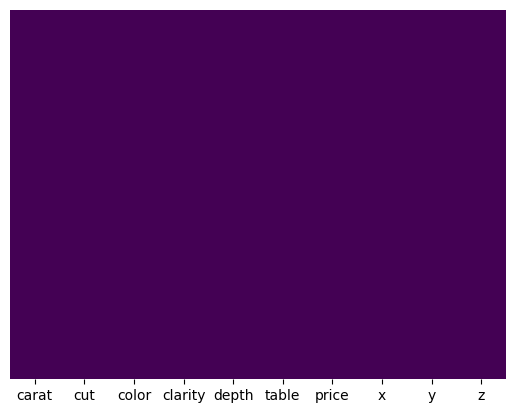

In [9]:
sns.heatmap(diamonds_original.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 2. Análise de valores únicos

In [10]:
# Ver quantos valores unicos existem para cada atributo
diamonds_original.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

Como todos os atributos possuem pelo menos dois valores únicos, não se vai eliminar nenhum deles com base neste critério. <br/>
De seguida vamos averiguar quais são os valores únicos dos atributos categóricos do dataset (<em>cut</em>, <em>color</em> e <em>clarity</em>).

In [11]:
print(diamonds_original['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [12]:
print(diamonds_original['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [13]:
print(diamonds_original['clarity'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


## 3. Outliers

In [14]:
from plotly.subplots import make_subplots

# vamos criar uma cópia do datset
diamonds_copia1 = diamonds_original.copy()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------

fig = make_subplots(rows=1, cols=3, subplot_titles=("Quilates", "Profundidade", "Mesa"))
fig1 = px.box(diamonds_copia1, y="carat")
fig3 = px.box(diamonds_copia1, y="depth")
fig4 = px.box(diamonds_copia1, y="table")

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig3.data[0], row=1, col=2)
fig.add_trace(fig4.data[0], row=1, col=3)

fig.update_layout(showlegend=False)

fig.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------

fig = make_subplots(rows=1, cols=4, subplot_titles=("Preço", "X", "Y", "Z"))
fig5 = px.box(diamonds_copia1, y="price")
fig6 = px.box(diamonds_copia1, y="x")
fig7 = px.box(diamonds_copia1, y="y")
fig8 = px.box(diamonds_copia1, y="z")          

fig.add_trace(fig5.data[0], row=1, col=1)
fig.add_trace(fig6.data[0], row=1, col=2)
fig.add_trace(fig7.data[0], row=1, col=3)
fig.add_trace(fig8.data[0], row=1, col=4)


fig.update_layout(showlegend=False)

fig.show()


Vamos ver o número de outliers que temos para cada um dos atributos em cima

In [15]:
cols = ["carat","depth","table","price","x","y","z"]

diamonds_copia2 = diamonds_copia1.copy()

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outlier_counts = {}
for col in cols:
    outlier_count = count_outliers(diamonds_copia2[col])
    outlier_counts[col] = outlier_count


for col, count in outlier_counts.items():
    print(f"Nº de outliers em '{col}': {count}")

Nº de outliers em 'carat': 1889
Nº de outliers em 'depth': 2545
Nº de outliers em 'table': 605
Nº de outliers em 'price': 3540
Nº de outliers em 'x': 32
Nº de outliers em 'y': 29
Nº de outliers em 'z': 49


## 4. Substituir valores categóricos
Apesar do <em>target</em> ser um atributo numérico, existem atributos categóricos no dataset. <br/>
Esses atributos são <em>cut</em>, <em>color</em> e <em>clarity</em>. <br/>
Vamos exprimentar substituir estes valores por números.

In [16]:
diamonds_copia3 = diamonds_original.copy()
diamonds_copia3.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

#### a) Substituir por números
Vamos criar um dicionário para cada atributo categórico onde atribuimos a cada string um valor numérico. <br/>

cut ---> "Ideal" = 0, "Premium" = 1, "Good" = 2, "Very Good" = 3, "Fair" = 4 <br/>
color ---> "E" = 0, "I" = 1, "J" = 2, "H" = 3, "F" = 4, "G" = 5, "D" = 6 <br/>
clarity ---> "SI2" = 0, "SI1" = 1, "VS1" = 2, "VS2" = 3, "VVS2" = 4, "VVS1" = 5, "I1" = 6, "IF" = 7 

In [17]:
replace_map = {'cut' : {'Ideal':0, 'Premium':1, 'Good':2, 'Very Good':3, 'Fair':4}}
replace_map2 = {'color' : {'E':0, 'I':1, 'J':2, 'H':3, 'F':4, 'G':5, 'D':6}}
replace_map3 = {'clarity' : {'SI2':0, 'SI1':1, 'VS1':2, 'VS2':3, 'VVS2':4, 'VVS1':5, 'I1':6, 'IF':7}}

diamonds_copia3.replace(replace_map, inplace=True)
diamonds_copia3.replace(replace_map2, inplace=True)
diamonds_copia3.replace(replace_map3, inplace=True)

diamonds_copia3.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    0      0        0   61.5   55.0    326  3.95  3.98  2.43
1   0.21    1      0        1   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      0        2   56.9   65.0    327  4.05  4.07  2.31
3   0.29    1      1        3   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      2        0   63.3   58.0    335  4.34  4.35  2.75

#### b) Factorização
Vamos experimentar factorizar estes três atributos

In [18]:
diamonds_copia4 = diamonds_original.copy()

diamonds_copia4['cut'] = pd.factorize(diamonds_copia4['cut'])[0] + 1
diamonds_copia4['color'] = pd.factorize(diamonds_copia4['color'])[0] + 1
diamonds_copia4['clarity'] = pd.factorize(diamonds_copia4['clarity'])[0] + 1

diamonds_copia4.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    1      1        1   61.5   55.0    326  3.95  3.98  2.43
1   0.21    2      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    3      1        3   56.9   65.0    327  4.05  4.07  2.31
3   0.29    2      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31    3      3        1   63.3   58.0    335  4.34  4.35  2.75

#### c) Binary encoding

In [19]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [20]:
import category_encoders as ce

In [21]:
diamonds_copia5 = diamonds_original.copy()

encoder_cut = ce.BinaryEncoder(cols=['cut'])
encoder_clarity = ce.BinaryEncoder(cols=['clarity'])
encoder_color = ce.BinaryEncoder(cols=['color'])

# Aplique o Binary Encoding para cada atributo e substitua as colunas originais pelos novos valores codificados
dados_encoded_cut = encoder_cut.fit_transform(diamonds_copia5['cut'])
dados_encoded_clarity = encoder_clarity.fit_transform(diamonds_copia5['clarity'])
dados_encoded_color = encoder_color.fit_transform(diamonds_copia5['color'])

resultado_final = pd.concat([dados_encoded_cut, dados_encoded_clarity, dados_encoded_color, diamonds_copia5.drop(columns=['cut', 'clarity', 'color'])], axis=1)


resultado_final.head()

cut_0  cut_1  cut_2  clarity_0  clarity_1  clarity_2  clarity_3  color_0  \
0      0      0      1          0          0          0          1        0   
1      0      1      0          0          0          1          0        0   
2      0      1      1          0          0          1          1        0   
3      0      1      0          0          1          0          0        0   
4      0      1      1          0          0          0          1        0   

   color_1  color_2  carat  depth  table  price     x     y     z  
0        0        1   0.23   61.5   55.0    326  3.95  3.98  2.43  
1        0        1   0.21   59.8   61.0    326  3.89  3.84  2.31  
2        0        1   0.23   56.9   65.0    327  4.05  4.07  2.31  
3        1        0   0.29   62.4   58.0    334  4.20  4.23  2.63  
4        1        1   0.31   63.3   58.0    335  4.34  4.35  2.75

#### d) One-Hot encoding

One-Hot enconding para o atributo <em>cut</em> usado como target em algoritmos de classificação

In [22]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
diamonds_copia6 = diamonds_original.copy()

lb = LabelBinarizer()

lb_results = lb.fit_transform(diamonds_copia6['cut'])

lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

diamonds_copia6 = pd.concat([diamonds_copia6, lb_results_df], axis=1)
diamonds_copia6.head()

carat      cut color clarity  depth  table  price     x     y     z  Fair  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43     0   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31     0   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31     0   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63     0   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75     0   

   Good  Ideal  Premium  Very Good  
0     0      1        0          0  
1     0      0        1          0  
2     1      0        0          0  
3     0      0        1          0  
4     1      0        0          0

-----------------------------
# Exploração de dados
-----------------------------

## 1. Vamos criar um <em>barplot</em> para analisar a distribuição de corte

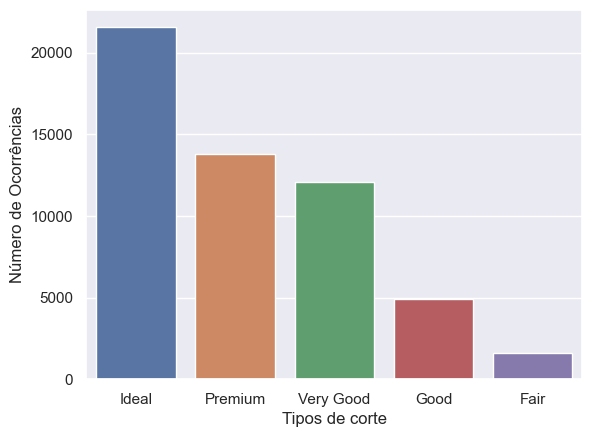

In [24]:
cut_count = diamonds_original['cut'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = cut_count.index, y = cut_count.values)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Tipos de corte', fontsize=12)
plt.show()

## 2. Vamos criar um <em>pie plot</em> para analisar a distribuição de corte

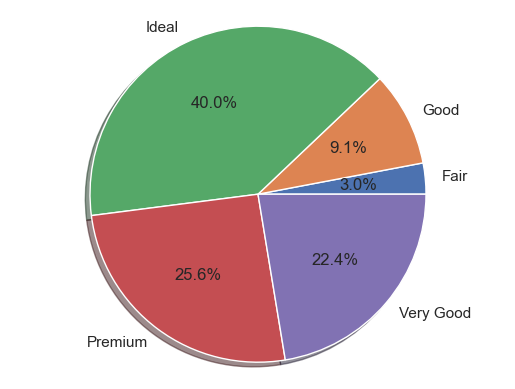

In [25]:
labels = diamonds_original['cut'].astype('category').cat.categories.tolist()
counts = diamonds_original['cut'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

## 3. Vamos analisar com <em>pair plot</em>

d:\Users\Afonso Marques\miniconda3\envs\virtualEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



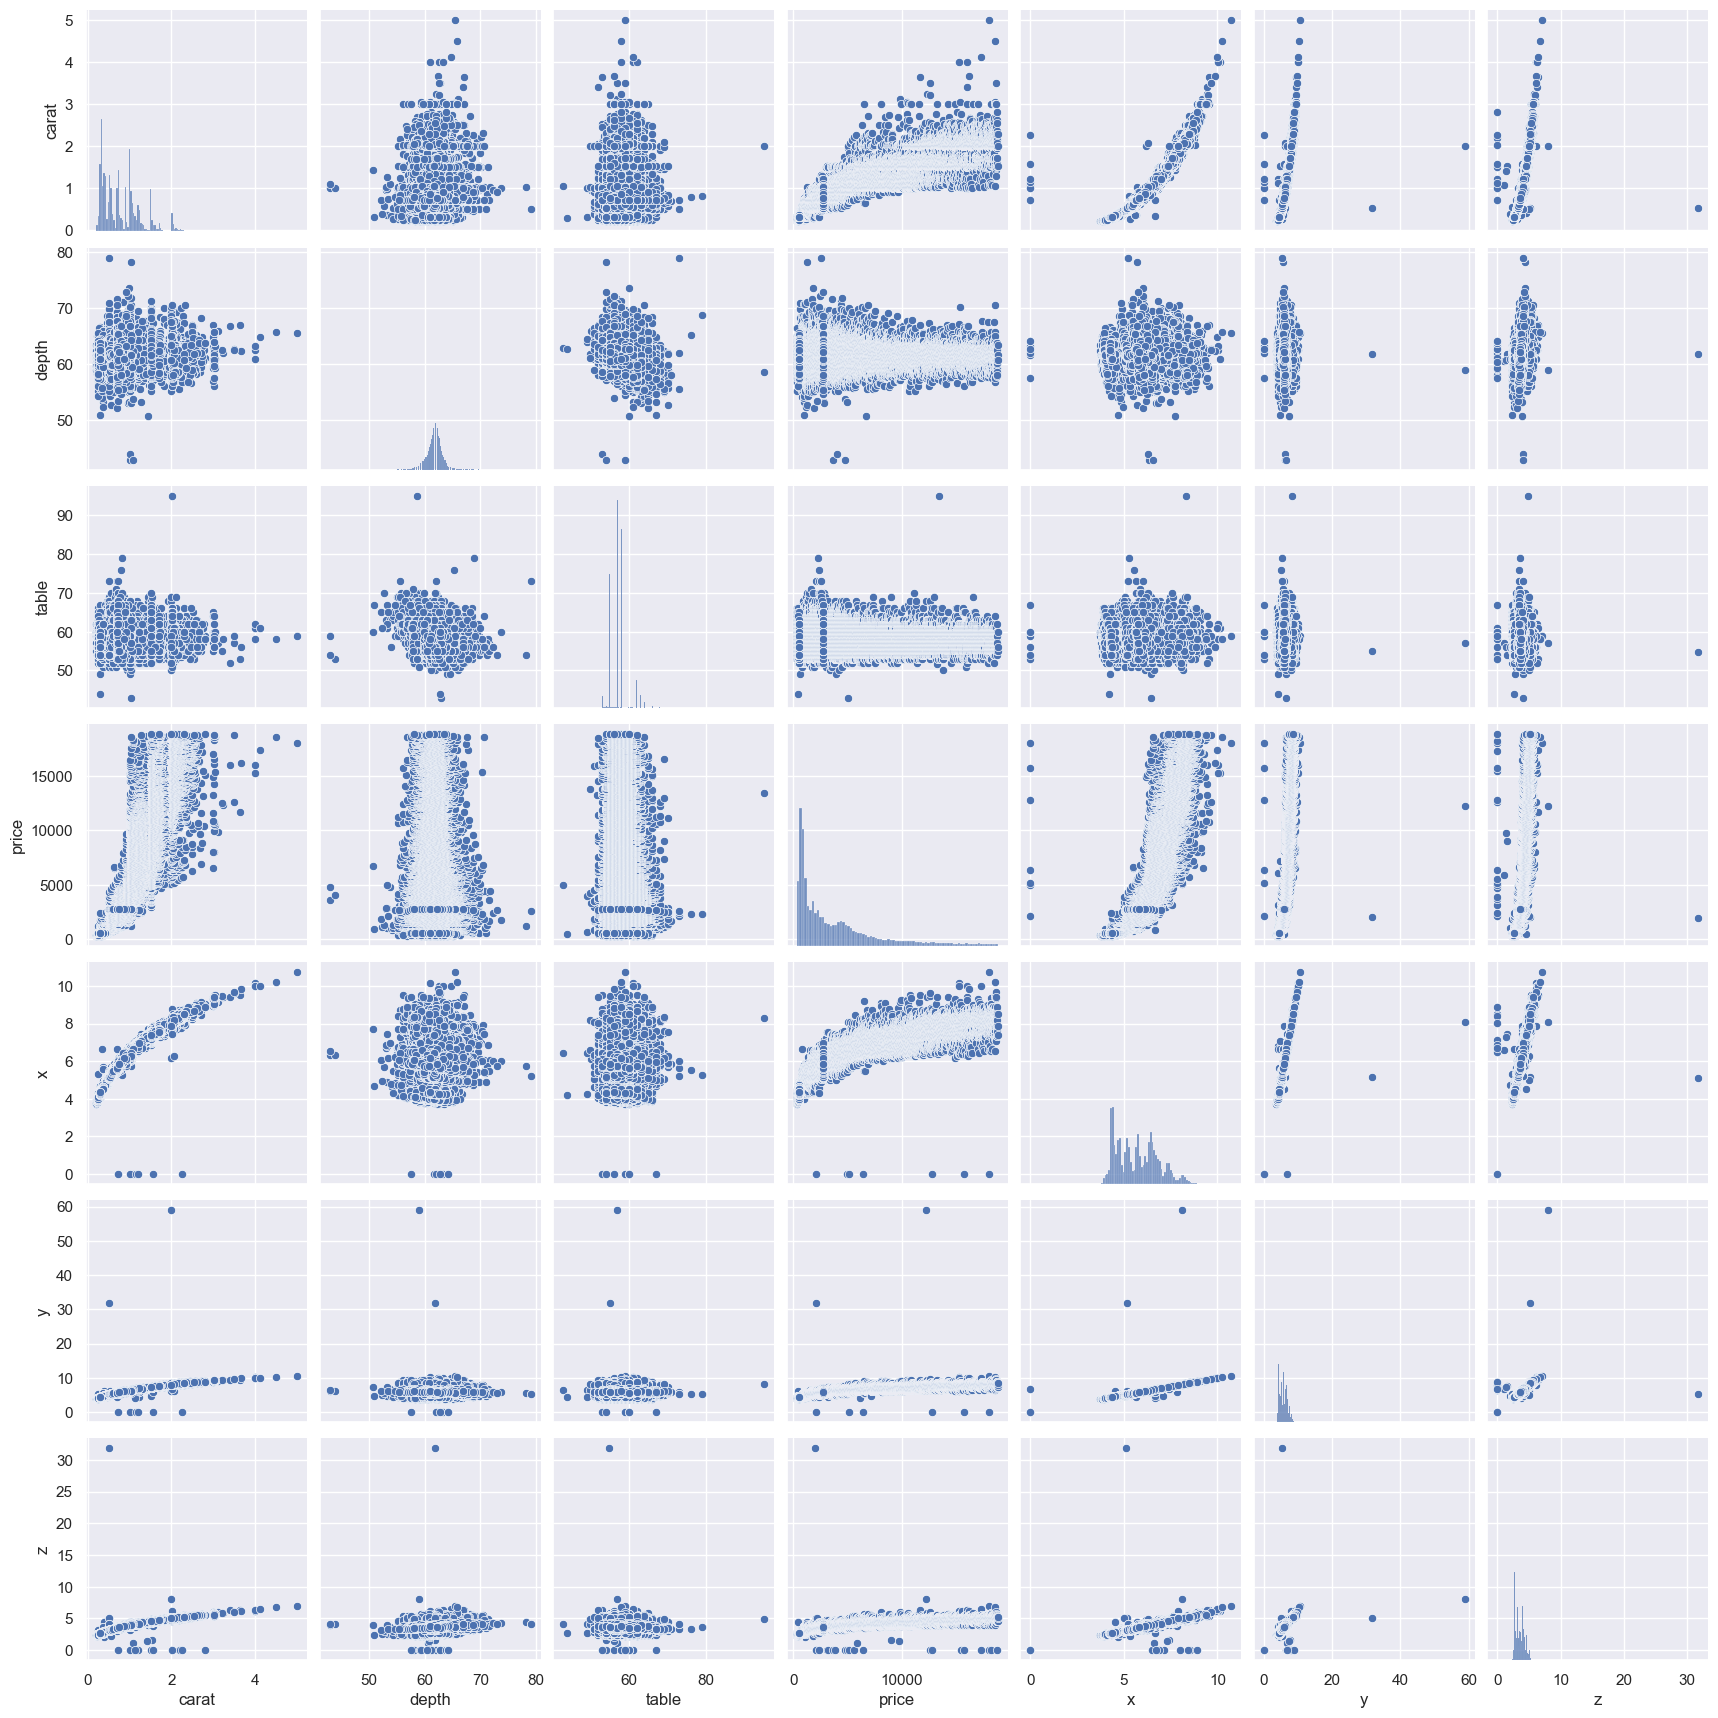

In [26]:
sns.pairplot(diamonds_original)

É dificil analisar a relação de todos os atributos. Vamos criar <em>jointplots</em> para analisar algumas relações. 

#### a) <em>Jointplot</em> of <em>carat vs. price</em>

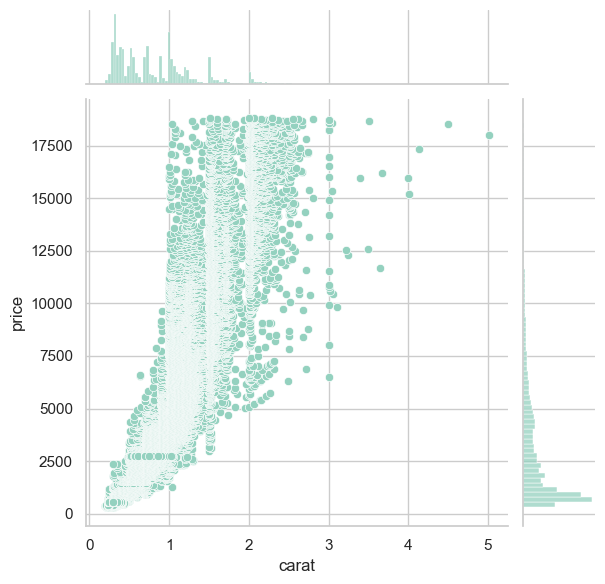

In [27]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x = 'carat', y = 'price', data = diamonds_original)

#### b) <em>Jointplot</em> of <em>depth vs. price</em>

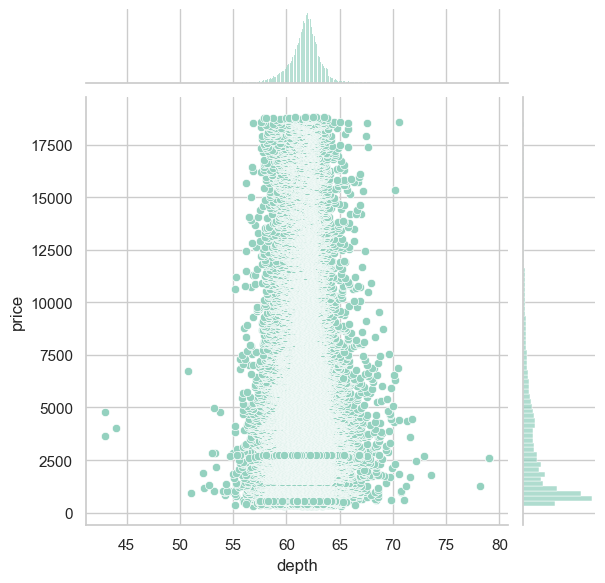

In [28]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x = 'depth', y = 'price', data = diamonds_original)

#### c) <em>Jointplot</em> of <em>table vs. price</em>

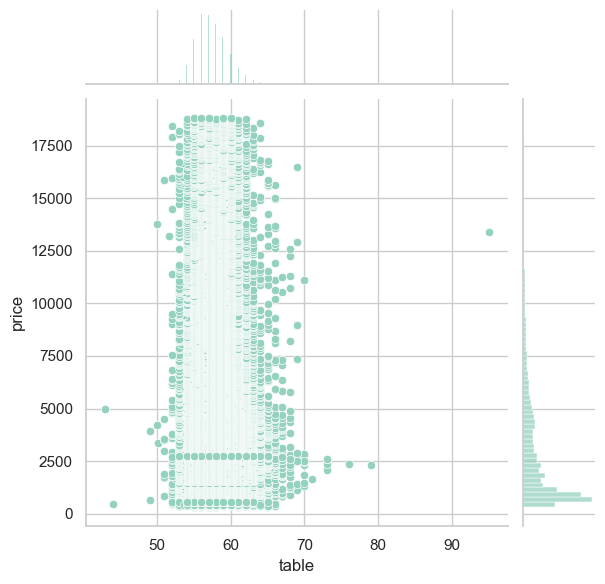

In [29]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x = 'table', y = 'price', data = diamonds_original)

#### c) <em>lmplot</em> of <em>table vs. depth</em>

d:\Users\Afonso Marques\miniconda3\envs\virtualEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



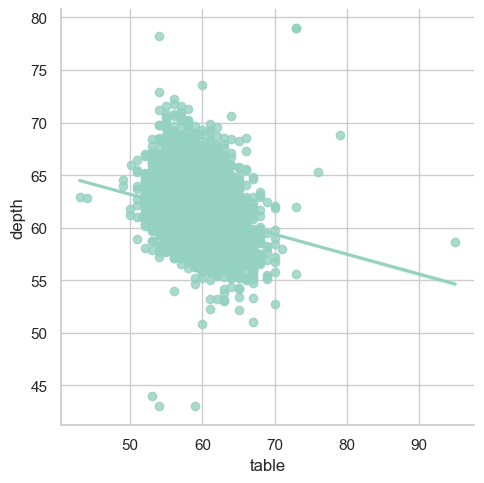

In [30]:
sns.lmplot(x = 'table', y = 'depth', data = diamonds_original)

## 4. Vamos analisar a matriz de correlação

<Axes: >

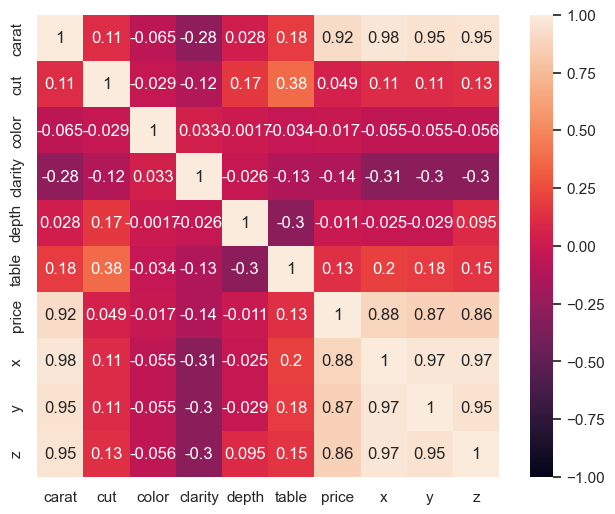

In [31]:
# vamos usar a copia4 do dataset onde foi feita factorização dos atributos categóricos

#fig = plt.figure(figsize = (8,6))
#diamonds_corr = diamonds_copia4.corr(method='pearson')
#sns.heatmap(diamonds_corr, linecolor='black', linewidths=0.5)

corr_matrix = diamonds_copia4.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Conseguimos ver que existe maior correlação entre:
- <em>price</em> e <em>carat</em>
- <em>x</em> e <em>y</em>
- <em>x</em> e <em>z</em>

-----------------------------
# Implementação de um modelo de Linear Regression
-----------------------------

Tendo em conta que o dataset escolhido pelo grupo é de regressão, o primeiro modelo que decidimos implementar será de regressão linear. 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### a) Tratamento de dados para o modelo
- Fazer normalização de atributos 

In [33]:
# vamos usar a copia4 do dataset onde foram realizadas as fatorizações de valores categóricos.
diamonds_normalize = diamonds_copia4.copy()

#normalização min-max para os atributos 'depth', 'table', 'price', 'x' , 'y', 'z'
atributos_para_normalizar = ['carat', 'depth', 'table', 'price', 'x' , 'y', 'z']

diamonds_normalize[atributos_para_normalizar] = MinMaxScaler().fit_transform(diamonds_normalize[atributos_para_normalizar])

diamonds_normalize.head()


carat  cut  color  clarity     depth     table     price         x  \
0  0.006237    1      1        1  0.513889  0.230769  0.000000  0.367784   
1  0.002079    2      1        2  0.466667  0.346154  0.000000  0.362197   
2  0.006237    3      1        3  0.386111  0.423077  0.000054  0.377095   
3  0.018711    2      2        4  0.538889  0.288462  0.000433  0.391061   
4  0.022869    3      3        1  0.563889  0.288462  0.000487  0.404097   

          y         z  
0  0.067572  0.076415  
1  0.065195  0.072642  
2  0.069100  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478

- Remover outliers

In [34]:
diamonds_normalize_noOutliers = diamonds_normalize.copy()

Q1 = diamonds_normalize_noOutliers.quantile(0.25)
Q3 = diamonds_normalize_noOutliers.quantile(0.75)
IQR = Q3 - Q1

diamonds_normalize_noOutliers = diamonds_normalize_noOutliers[~((diamonds_normalize_noOutliers < (Q1 - 1.5 * IQR)) | (diamonds_normalize_noOutliers > (Q3 + 1.5 * IQR))).any(axis=1)]

diamonds_normalize_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45873 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    45873 non-null  float64
 1   cut      45873 non-null  int64  
 2   color    45873 non-null  int64  
 3   clarity  45873 non-null  int64  
 4   depth    45873 non-null  float64
 5   table    45873 non-null  float64
 6   price    45873 non-null  float64
 7   x        45873 non-null  float64
 8   y        45873 non-null  float64
 9   z        45873 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.8 MB


Ao remover outliers o número de entradas diminui de 53940 para 45873 

#### b) Aplicação do modelo
Vamos usar a versão normalizada e sem outliers (diamonds_normalize_noOutliers) do dataset

In [35]:
x = diamonds_normalize_noOutliers[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x' , 'y', 'z']]
x.head()

carat  cut  color  clarity     depth     table         x         y  \
0  0.006237    1      1        1  0.513889  0.230769  0.367784  0.067572   
1  0.002079    2      1        2  0.466667  0.346154  0.362197  0.065195   
3  0.018711    2      2        4  0.538889  0.288462  0.391061  0.071817   
4  0.022869    3      3        1  0.563889  0.288462  0.404097  0.073854   
5  0.008316    4      3        5  0.550000  0.269231  0.366853  0.067233   

          z  
0  0.076415  
1  0.072642  
3  0.082704  
4  0.086478  
5  0.077987

In [36]:
y = diamonds_normalize_noOutliers['price'].to_frame()   # ---> o nosso target
y.head()

price
0  0.000000
1  0.000000
3  0.000433
4  0.000487
5  0.000541

Vamos treinar o modelo

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2021)
linear_regression_model = LinearRegression() # Creating an Instance of LinearRegression model
linear_regression_model.fit(x_train,y_train) # Train/fit 

LinearRegression()

In [38]:
print(linear_regression_model.coef_)

[[ 2.61179453e+00 -2.49401645e-03  3.59691562e-03  1.29050895e-02
  -6.00427149e-02 -1.12460334e-01 -1.02296611e+00  4.62902284e+00
  -2.16474563e+00]]


Fazer previsões

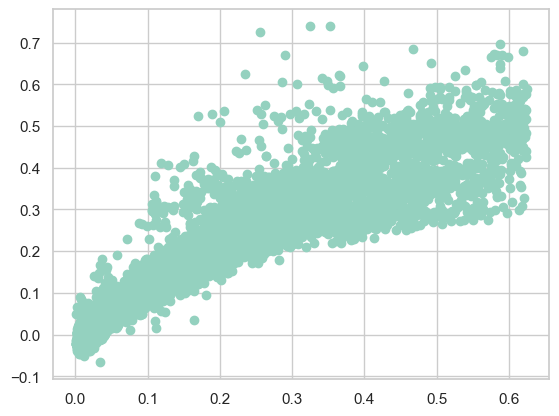

In [39]:
prediction = linear_regression_model.predict(x_test)
plt.scatter(y_test,prediction)

Resultados:

In [40]:
print('MAE = ', metrics.mean_absolute_error(y_test,prediction) )
print('MSE = ', metrics.mean_squared_error(y_test,prediction))
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2 =', metrics.r2_score(y_test, prediction))

MAE =  0.032136575296992695
MSE =  0.0026195325835715114
RMSE = 0.0511813694968346
R^2 = 0.881710088508643



Um MAE (Erro Absoluto Médio) de aproximadamente 0.0321 indica que, em média, as previsões do modelo têm um erro absoluto de cerca de 0.0321 unidades em relação aos valores reais. Como o MAE é uma medida de erro absoluto, menor é melhor. Neste caso, o valor é bastante pequeno. <br/>

Um MSE (Erro Quadrático Médio) de aproximadamente 0.00261 indica que o erro médio quadrático entre as previsões do modelo e os valores reais é de cerca de 0.00261. Como o MSE é uma medida de erro quadrático, valores menores são melhores. Novamente, esse valor é bastante pequeno. <br/>

A raiz quadrada do MSE (RMSE) é aproximadamente 0.0511. O RMSE fornece uma interpretação mais intuitiva do erro, na mesma unidade que a variável de resposta original. Um RMSE pequeno indica que o modelo está fazendo boas previsões em relação aos valores reais. <br/>

O R^2 (Coeficiente de Determinação) é aproximadamente 0.8817. Isso significa que modelo explica cerca de 87.33% da variabilidade presente nos dados normalizados. <br/>

-----------------------------
# Implementação de um modelo de Decision Tree Regressor
-----------------------------

Agora vamos aplicar outro algoritmo de regressão, mais precisamente uma árvore de decissão de regressão. <br/>
Iremos usar a versão normalizada e sem outliers (<em>diamonds_normalize_noOutliers</em>)  do dataset

In [41]:
from sklearn.tree import DecisionTreeRegressor

Treinar o modelo

In [42]:
x = diamonds_normalize_noOutliers[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x' , 'y', 'z']]
y = diamonds_normalize_noOutliers['price'].to_frame()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2021)

regression_tree_model = DecisionTreeRegressor(random_state=2021)  
regression_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2021)

Fazer previsões 

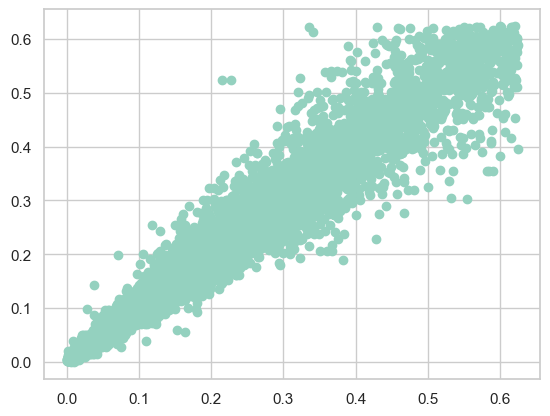

In [43]:
prediction = regression_tree_model.predict(x_test)
plt.scatter(y_test,prediction)

Resultados:

In [44]:
print('MAE = ', metrics.mean_absolute_error(y_test,prediction) )
print('MSE = ', metrics.mean_squared_error(y_test,prediction))
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2 =', metrics.r2_score(y_test, prediction))

MAE =  0.015096704920165337
MSE =  0.000797935595082276
RMSE = 0.028247753805962627
R^2 = 0.9639677202299213


Com base nos resultados obtidos é possivel concluir que houve ligeiras melhorias em relação ao modelo anterior. <br/>
É de notar que R^2 ficou mais próximo de 1, pelo que as previsões são ainda mais precisas.

-----------------------------
# Implementação de um modelo de Redes Neuronais (Multilayer Perceptron)
-----------------------------

Agora vamos aplicar um algoritmo de regressão que utiliza redes neuronais, mais precisamente um algoritmo de Multilayer Perceptron. <br/>
Iremos usar a versão normalizada e sem outliers (<em>diamonds_normalize_noOutliers</em>)  do dataset.

In [45]:
%pip install tensorflow
%pip install --upgrade keras
%pip install scikeras[tensorflow]


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b2/e4/30b53d839608d2212b97972a8516ba0c7e776ee1102eaa82624807b944cf/keras-3.0.1-py3-none-any.whl.metadata
  Using cached keras-3.0.1-py3-none-any.whl.metadata (4.8 kB)
Using cached keras-3.0.1-py3-none-any.whl (999 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.1 requires keras<2.13,>=2.12.0, but you have keras 3.0.1 which is incompatible.


  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.1
    Uninstalling keras-3.0.1:
      Successfully uninstalled keras-3.0.1
Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

from sklearn import metrics

print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.12.1


Construir o modeolo MLP

In [47]:
# input_dim = 7 porque o x só vai ter 7 atributos
def build_model(activation = 'relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16, input_dim = 7, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1,activation=activation)) # output

    #compile the model
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )

    return model

model_res = build_model()
model_res.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Vamos usar <em>GridSearchCV</em> para ajustar o modelo. <br>
Temos de definir os parametros <em>grid</em> usando um dicionário. <br>

- optimizer - <em>optimizers</em> são algoritmos ou métodos usados para alterar os atributos de uma rede neuronal, tais como os pesos e a taxa de aprendizagem (<em>learning rate</em>) de forma a reduzir o número de perdas.<br>

- loss - a função de <em>loss</em> é uma função que compara os valores de <em>target</em> com as previsões feitas; serve para medir o quão bem a rede neural modela os dados de trino. <br>
Durante o treino, o objetivo é minimizar a perda entre os <em>outputs</em> previstos e os <em>target's</em>.

In [48]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
#loss = ['mse', 'mae', 'kl']
param_grid = dict(optimizer = optimizer)#, loss = loss)

Nova cópia do datset

In [49]:
newcopy = diamonds_normalize_noOutliers.copy()
newcopy.head()

carat  cut  color  clarity     depth     table     price         x  \
0  0.006237    1      1        1  0.513889  0.230769  0.000000  0.367784   
1  0.002079    2      1        2  0.466667  0.346154  0.000000  0.362197   
3  0.018711    2      2        4  0.538889  0.288462  0.000433  0.391061   
4  0.022869    3      3        1  0.563889  0.288462  0.000487  0.404097   
5  0.008316    4      3        5  0.550000  0.269231  0.000541  0.366853   

          y         z  
0  0.067572  0.076415  
1  0.065195  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478  
5  0.067233  0.077987

Fazer o <em>partitioning</em> e remover os atributos categóricos

In [50]:
# partitioning
x = newcopy[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x' , 'y', 'z']]
y = newcopy['price'].to_frame()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2021)

# remover categóricos
x_train = x_train.drop(['color', 'clarity'], axis=1)  
x_test = x_test.drop(['color', 'clarity'], axis=1)  

- Definir um KFold com 5 <em>splits</em>
- Usar um <em>KerasRegressor</em> com um tamanho de <em>batch</em> de 32, <em>split</em> de validação de 0.2 e 10 <em>epochs</em>:
- Definir um <em>GridSearchCV</em> com <em>scoring</em> <em>NegMAE</em>, <em>refit</em> e um <em>verbose</em> de <em>1</em>:

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

model = KerasRegressor(model=build_model, batch_size=32, validation_split=0.2, epochs=30)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

Treinar o modelo de GridSearch

In [52]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/30


734/734 [==============================] - 8s 5ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0455 - val_loss: 0.1528 - val_mae: 0.1528 - val_mse: 0.0453
Epoch 2/30
734/734 [==============================] - 3s 5ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0455 - val_loss: 0.1528 - val_mae: 0.1528 - val_mse: 0.0453
Epoch 3/30
734/734 [==============================] - 3s 5ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0455 - val_loss: 0.1528 - val_mae: 0.1528 - val_mse: 0.0453
Epoch 4/30
734/734 [==============================] - 4s 5ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0455 - val_loss: 0.1528 - val_mae: 0.1528 - val_mse: 0.0453
Epoch 5/30
734/734 [==============================] - 4s 5ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0455 - val_loss: 0.1528 - val_mae: 0.1528 - val_mse: 0.0453
Epoch 6/30
734/734 [==============================] - 4s 5ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0455 - val_loss: 0.1528 - val_mae: 0.1528 - val_mse: 0.0453
Epoch 7/30
734/734 [=======

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=30, model=<function build_model at 0x000002074CC98EE0>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)


Encontrar o melhor <em>score</em> e os melhores parâmetros:

In [53]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.128541 using {'optimizer': 'Adagrad'}


Encontrar <em>mean test score</em>, <em>std test score</em> e <em>params</em> para cada procura feita: 

In [54]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

-0.128972 (0.046713) with {'optimizer': 'SGD'}
-0.128996 (0.046651) with {'optimizer': 'RMSprop'}
-0.128541 (0.047560) with {'optimizer': 'Adagrad'}


Ir buscar o melhor modelo e treiná-lo.

In [55]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

best_mlp_model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test), verbose=1)

KerasRegressor(
	model=<function build_model at 0x000002074CC98EE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=30
)
Epoch 1/30


1147/1147 [==============================] - 3s 2ms/step - loss: 0.0400 - mae: 0.0400 - mse: 0.0040 - val_loss: 0.0336 - val_mae: 0.0336 - val_mse: 0.0032
Epoch 2/30
1147/1147 [==============================] - 2s 2ms/step - loss: 0.0342 - mae: 0.0342 - mse: 0.0032 - val_loss: 0.0385 - val_mae: 0.0385 - val_mse: 0.0032
Epoch 3/30
1147/1147 [==============================] - 2s 2ms/step - loss: 0.0338 - mae: 0.0338 - mse: 0.0032 - val_loss: 0.0336 - val_mae: 0.0336 - val_mse: 0.0034
Epoch 4/30
1147/1147 [==============================] - 2s 2ms/step - loss: 0.0338 - mae: 0.0338 - mse: 0.0032 - val_loss: 0.0354 - val_mae: 0.0354 - val_mse: 0.0032
Epoch 5/30
1147/1147 [==============================] - 2s 2ms/step - loss: 0.0337 - mae: 0.0337 - mse: 0.0032 - val_loss: 0.0332 - val_mae: 0.0332 - val_mse: 0.0033
Epoch 6/30
1147/1147 [==============================] - 2s 2ms/step - loss: 0.0336 - mae: 0.0336 - mse: 0.0032 - val_loss: 0.0335 - val_mae: 0.0335 - val_mse: 0.0031
Epoch 7/30
1147

KerasRegressor(
	model=<function build_model at 0x000002074CC98EE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=30
)

Performance do melhor modelo:

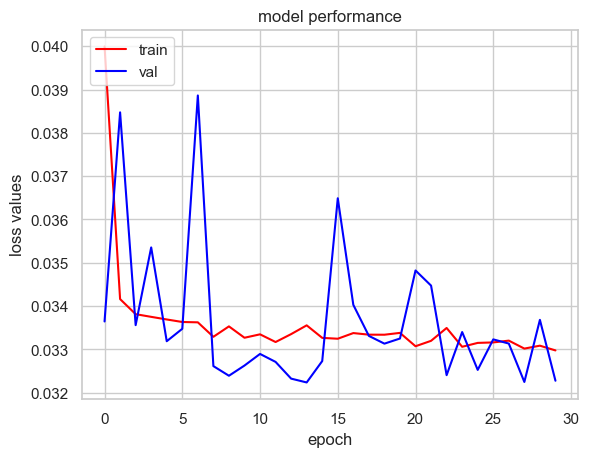

In [56]:
plt.plot(best_mlp_model.history_['loss'], color='red')
plt.plot(best_mlp_model.history_['val_loss'], color='blue')
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

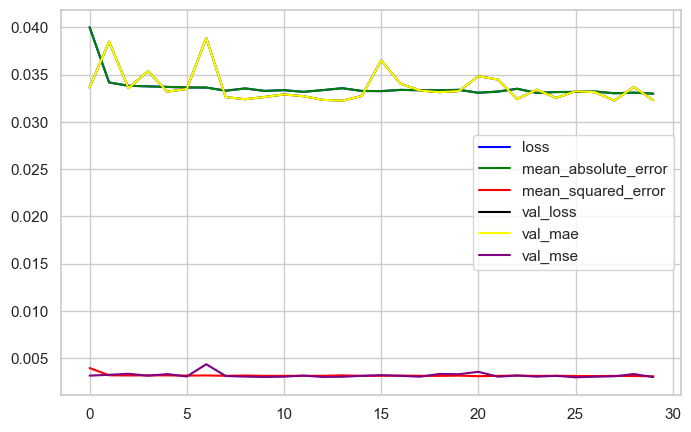

In [57]:
colors = ['blue', 'green', 'red', 'black', 'yellow', 'purple']


pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5), color=colors)
plt.show()

Fazer previsões com o melhor modelo:

  1/287 [..............................] - ETA: 21s

287/287 [==============================] - 0s 1ms/step


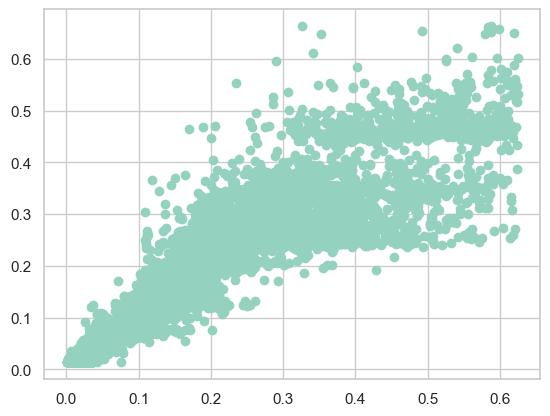

In [58]:
predictions = best_mlp_model.predict(x_test)
plt.scatter(y_test, predictions)

Resultados:

In [59]:
print('MAE = ', metrics.mean_absolute_error(y_test,predictions) )
print('MSE = ', metrics.mean_squared_error(y_test,predictions))
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2 =', metrics.r2_score(y_test, predictions))

MAE =  0.03227622083291104
MSE =  0.0030004056295604565
RMSE = 0.054775958499696346
R^2 = 0.8655069091700114


Com base nos resultados obtidos é possivel concluir, quando comparado com o modelo anterior (Decision Tree Regressor), que as métricas obtidas são piores, com destaque para o R^2 que desceu para os 0.86..., ou seja, as previsões não são tão precisas como antes. <br>
Ainda assim não deixa de ser um bom modelo. <br>

Para comparação, eis os resultados do modelo com Decision Tree Regressor: <br>
- MAE =  0.015096704920165337 <br>
- MSE =  0.000797935595082276 <br>
- RMSE = 0.028247753805962627 <br>
- R^2 = 0.9639677202299213

-----------------------------
# Implementação de um modelo com Emsemble Learning
-----------------------------

Finalmente iremos agora implementar um modelo com recurso a Ensemble Learning, mais precisamente um modelo de Gradient Boosting Regressor.<br/>
Iremos usar como target o atributo <em>price</em>. <br>

#### Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

x = diamonds_normalize_noOutliers[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x' , 'y', 'z']]
y = diamonds_normalize_noOutliers['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2021)

Treinar o modelo

In [87]:
gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(x_train, y_train)

gbr_score = gradient_boosting_regressor.score(x_test,y_test)

print("Accuracy: %.2f%%" % (gbr_score * 100))

Accuracy: 97.14%


Fazer previsões

In [88]:
gbr_predictions = gradient_boosting_regressor.predict(x_test)
print(gbr_predictions)

gbr_predictions

[0.01142043 0.20928263 0.06284303 ... 0.13051423 0.33693084 0.11106342]


array([0.01142043, 0.20928263, 0.06284303, ..., 0.13051423, 0.33693084,
       0.11106342])

Resultados:

In [89]:
print('MAE = ', metrics.mean_absolute_error(y_test,gbr_predictions) )
print('MSE = ', metrics.mean_squared_error(y_test,gbr_predictions))
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, gbr_predictions)))
print('R^2 =', metrics.r2_score(y_test, gbr_predictions))

MAE =  0.01514802379411104
MSE =  0.0006334226989810069
RMSE = 0.02516789023698663
R^2 = 0.9713966088954227


Foi o melhor resultado obtido de todos os modelos de regressão, com R^2 = 0.97...

#
###################################################################################################################################################################################################
#

-----------------------------
# Implementação de um modelo de Decision Tree Classifier
-----------------------------

Partindo agora para alguns algoritmos de classificação, que se utilizam especialmente quando lidamos com atributos categóricos. Neste primeiro caso iremos aplicar um algoritmo com árvore de decisão de classificação. <br/>
Iremos usar como target o atributo <em>cut</em>

#### a) Rever a informação original do dataset

In [60]:
diamonds_original.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

#### b) Aplicação do modelo
Vamos usar a versão normalizada e sem outliers (<em>diamonds_normalize_noOutliers</em>) do dataset que contém as seguintes alterações: <br>
- normalização dos restantes atributos <br>
- remoção de outliers

Ainda assim vamos ter de remover os restantes atributos categóricos do dataset.

In [61]:
x = diamonds_normalize_noOutliers[['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x' , 'y', 'z']]
y = diamonds_normalize_noOutliers['cut'].to_frame()  # desta vez o target será o atributo 'cut'

In [62]:
x.head()

carat  color  clarity     depth     table     price         x         y  \
0  0.006237      1        1  0.513889  0.230769  0.000000  0.367784  0.067572   
1  0.002079      1        2  0.466667  0.346154  0.000000  0.362197  0.065195   
3  0.018711      2        4  0.538889  0.288462  0.000433  0.391061  0.071817   
4  0.022869      3        1  0.563889  0.288462  0.000487  0.404097  0.073854   
5  0.008316      3        5  0.550000  0.269231  0.000541  0.366853  0.067233   

          z  
0  0.076415  
1  0.072642  
3  0.082704  
4  0.086478  
5  0.077987

In [63]:
y.head()

cut
0    1
1    2
3    2
4    3
5    4

Treinar o modelo

In [64]:
from sklearn.tree import DecisionTreeClassifier

Treino do modelo.
Temos de remover os atributos categóricos <em>color</em> e <em>clarity</em> em x.

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2021)

In [66]:
x_train = x_train.drop(['color', 'clarity'], axis=1)  
x_test = x_test.drop(['color', 'clarity'], axis=1)   

Criar o modelo

In [67]:
classifier_tree_model = DecisionTreeClassifier(random_state=2021)  
classifier_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2021)

Vamos fazer as previsões

In [68]:
predictions = classifier_tree_model.predict(x_test)
predictions

array([4, 4, 4, ..., 4, 2, 1], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

Resultados:

In [70]:
matriz_confusao = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
#roc_auc = roc_auc_score(y_test, predictions, average='macro')
#fpr, tpr, _ = roc_curve(y_test, predictions, average='micro')
#f1 = f1_score(y_test, predictions, average='micro')
#fbeta = fbeta_score(y_test, predictions, beta=0.5, average='micro')

print(f"Matriz de confusão: \n {matriz_confusao} \n")
print(f"Accuracy: \n {accuracy} = {100 * accuracy} % \n")
print(f"Precision: \n {precision} = {100 * precision} % \n")
print(f"Recall: \n {recall} = {100 * recall} % \n")


Matriz de confusão: 
 [[4544  452   30  709    3]
 [ 416 2564   29  517    6]
 [  36   32  731  266   11]
 [ 705  481  282 1835    6]
 [   3   12   19   10   63]] 

Accuracy: 
 0.7075279755849441 = 70.75279755849441 % 

Precision: 
 0.7075279755849441 = 70.75279755849441 % 

Recall: 
 0.7075279755849441 = 70.75279755849441 % 



Se os valores de precisão, recall e accuracy são todos iguais, podemos interpretar isso como um indicativo de que o modelo de árvore de classificação está a fazer previsões consistentes.

-----------------------------
# Implementação de um modelo de Logistic Regression
-----------------------------

O segundo algoritmo de classificação a aplicar será um que utiliza regressão logistica. <br/>
Vamos utilizar na mesma a versão normalizada e sem outliers (<em>diamonds_normalize_noOutliers</em>) <br>
Iremos continuar a usar como target o atributo <em>cut</em>

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

- Treinar modelo e remover os atributos categóricos <em>color</em> e <em>clarity</em> em x.
- Criar o modelo
- Fazer as previsões

In [72]:
# treinar o modelo e remover atributos categóricos de x
x = diamonds_normalize_noOutliers[['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x' , 'y', 'z']]
y = diamonds_normalize_noOutliers['cut']  # desta vez o target será o atributo 'cut'

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=2021) # 70% training and 30% test

x_train = x_train.drop(['color', 'clarity'], axis=1)  
x_test = x_test.drop(['color', 'clarity'], axis=1)   



# criar o modelo usando um solver de média estocástica
logistic_regression_model = LogisticRegression(solver='sag', random_state=2021)
logistic_regression_model.fit(x_train, y_train)



# fazer previsões
predictions = logistic_regression_model.predict(x_test)
predictions

array([2, 2, 1, ..., 1, 2, 2], dtype=int64)

Resultados:

In [73]:
matriz_confusao = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
#roc_auc = roc_auc_score(y_test, predictions, average='macro')
#fpr, tpr, _ = roc_curve(y_test, predictions, average='micro')
#f1 = f1_score(y_test, predictions, average='micro')
#fbeta = fbeta_score(y_test, predictions, beta=0.5, average='micro')

print(f"Matriz de confusão: \n {matriz_confusao} \n")
print(f"Accuracy: \n {accuracy} = {100 * accuracy} % \n")
print(f"Precision: \n {precision} = {100 * precision} % \n")
print(f"Recall: \n {recall} = {100 * recall} % \n")

Matriz de confusão: 
 [[5414  209    3  112    0]
 [ 665 2222    0  645    0]
 [ 328  210  288  250    0]
 [1382 1084   55  788    0]
 [  14   19   69    5    0]] 

Accuracy: 
 0.6330475221624764 = 63.30475221624764 % 

Precision: 
 0.6330475221624764 = 63.30475221624764 % 

Recall: 
 0.6330475221624764 = 63.30475221624764 % 



Novamente os valores de precisão, recall e accuracy são todos iguais, podemos interpretar isso como um indicativo de que o modelo de regressão logistica está a fazer previsões consistentes. <br>
No entanto este modelo de classificação provou ser menos preciso do que o anterior. Descemos de uma <em>accuracy</em> de cerca de 70% para 63%.

-----------------------------
# Implementação de modelos não supervisionados (K-Means, K-Medoids)
-----------------------------

O segundo algoritmo de classificação a aplicar será um que utiliza regressão logistica. <br/>
Vamos utilizar na mesma a versão normalizada e sem outliers (<em>diamonds_normalize_noOutliers</em>) <br>
Iremos continuar a usar como target o atributo <em>cut</em>